In [ ]:
!pip install -r requirements.txt --quiet

/Users/maximemoutet/.pyenv/versions/venv-nlp-ensae/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
import os
import sys

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, "src"))
sys.path.append(project_root)

from src.FindLostArt import FindLostArt
from src.utils.image_tools import download_images_from_page, download_slider_from_page
from src.utils.text_tools import find_lostart_csv, keep_necessary_columns_la
import src.utils.timing as timing

/Users/maximemoutet/.pyenv/versions/venv-nlp-ensae/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
timing.TimingConfig.ENABLE = False  # Turn this on to enable timing

# Load the precomputed embeddings of texts and images
# You can compute your own embeddings using the notebooks in the src/notebooks directory
text_embeddings_file = "mnr_text_minilm_mean_pooling_embeddings.pt"
image_embeddings_file = "mnr_image_dino_cls_embeddings.pt"

In [ ]:
# Run the evaluation on the found images
test = FindLostArt().evaluate_on_found(
    cross_comparison=True,
    use_text=True,
    use_vision=True,
    beta=0.1,
    text_embeddings_file=text_embeddings_file,
    image_embeddings_file=image_embeddings_file
)
print(test)

In [165]:
# If you want to search a specific id:
id = 102985

# Get the csvs for the given id
df, csv = find_lostart_csv(id)
csv = csv[0].split(".")[0].split("=")[-1]
keep_necessary_columns_la(df)

,Lost Art ID,Hersteller/Künstler/Autor:in,Titel,Beschreibung
74,102985,"Schomann, Willi [Künstler:in]",Das Opfer Abrahams,Rechts im Vordergrund auf einem (steinernen ?)...


Image downloaded and saved as data/images/lostart/102985.jpg


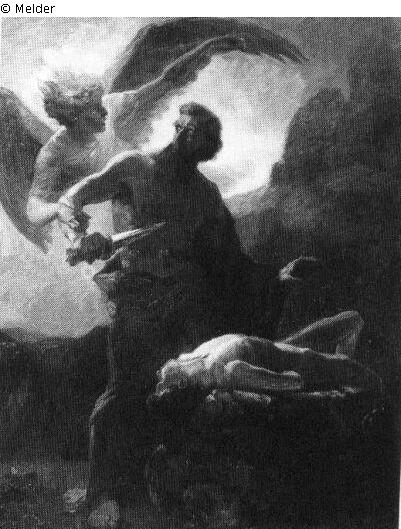

In [166]:
# We can download the associated image
download_images_from_page(df["Link"].item(), df["Lost Art ID"].item(), download_dir="data/images/lostart")

# Display information about the image
from PIL import Image

image_path = os.path.join("data/images/lostart", str(id) + ".jpg")
image = Image.open(image_path)
image

In [167]:
# You need to initialize the FindLostArt object with the start of the lostart csv you want to use
find_lostart = FindLostArt(start=csv)

# You can then run the search
result = find_lostart.search_lostart(
    id,
    cross_comparison=True,
    use_text=True,
    use_vision=True,
    beta=0.1,
    text_embeddings_file=text_embeddings_file,
    image_embeddings_file=image_embeddings_file,
    top_n=10
)
result

[TIMER] FindLostArt.search_lostart took 3.1433 seconds


,index,REF,AUTR,TITR,REPR,similarity
0,2109,MNR00279,RICCI Sebastiano,La Tentation de saint Antoine,"scène historique (saint Antoine ermite, tentat...",0.747434
1,323,MNR00053,BERTIN Nicolas,Pan et Syrinx ou Le Bain de Diane,"scène mythologique (Pan, Syrinx, poursuite, ny...",0.699825
2,2142,MNR00315,RICCI Sebastiano,Abraham et les trois anges,"scène biblique (Abraham, visite, ange, inspira...",0.689581
3,1250,MNR00829,DYCK Antoon van (d'après),Les Apprêts du martyre de saint Sébastien,"scène historique (saint Sébastien, nudité, lie...",0.685421
4,1996,MNR00789,PITTONI Giambattista,"Bacchus, Ariane et l'Amour","scène mythologique (Bacchus, Ariane : filage, ...",0.673079
5,2021,MNR00815,WILLEMSENS Antoon dit aussi Monigrammiste AW,Allégorie de la Paix,"scène (allégorie : paix, couronnement, putti, ...",0.660931
6,1420,MNR0265B,LIBERI Pietro,Allégorie avec deux figures féminines,"figures (allégorie, femme, en buste, nudité : ...",0.657819
7,346,MNR00076,TREMOLIERES Pierre-Charles,Vénus et l'Amour,"scène mythologique (Vénus, Cupidon, nudité, ét...",0.656951
8,244,MNR00598,LOMBARDI Giovanni Domenico,Saint Charles Borromée (ou Saint-François-Xavi...,"scène (saint Charles Borromée, ?, saint Franço...",0.656024
9,1844,MNR00624,CHAPERON Nicolas (d'après),L'Enfance de Bacchus,"scène mythologique (Bacchus, enfant, chèvre, a...",0.653790


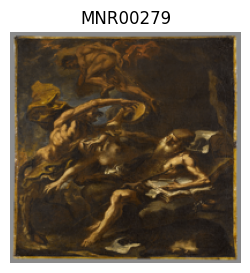

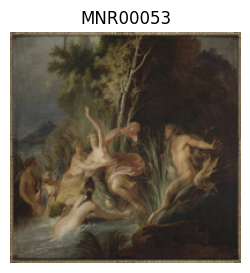

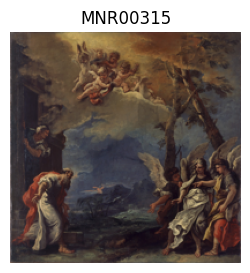

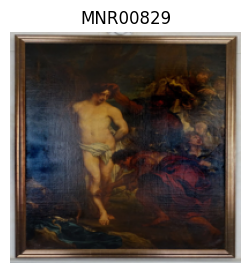

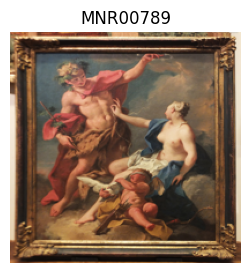

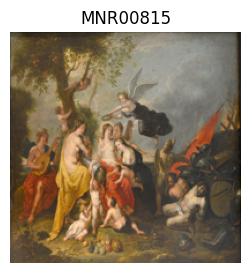

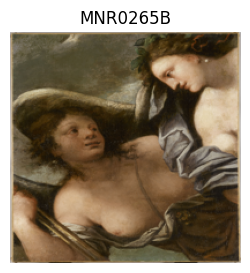

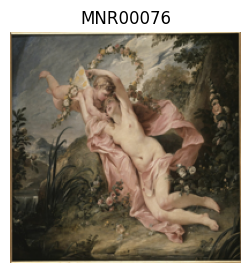

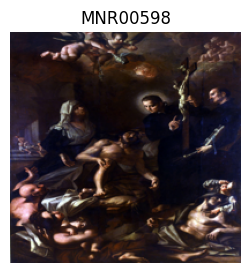

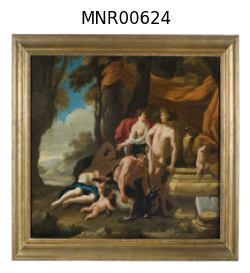

In [168]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Display images if they exist
for mnr_code in result["REF"]:
    try:
        image_path = os.path.join("data/images/mnr", str(mnr_code) + ".jpg")
        image = Image.open(image_path)
        
        # Resize image
        image = image.resize((200, 200))
        
        # Display the image in the notebook with the MNR code as the title
        plt.figure(figsize=(3, 3))  # Optionally set the figure size
        plt.imshow(image)
        plt.title(f"{mnr_code}")  # Title with the MNR code
        plt.axis('off')  # Hide axes
        plt.show()

    except FileNotFoundError:
        print(f"Image for MNR Code {mnr_code} not found.")
